# Introduction
Le but de cette analyse est trouver la meilleure façon afin de structurer les textes, on dispose de plusieurs méthodes :
- Occurrence (mots, bigrams, trigram).   
- Nombre d'occurrences (mots, bigram, trigram).
- TF-IDF (mots, bigram, trigram).

Dans cette section on procéder aux testes des techniques ci-dessus et on enregistre les scores eu pour chque technique et pour chque modèle dans l'ordre suivant:

1. Uniquement les mots:
    1. Binary Matrice Only.
    2. Count Matrice Only.
    3. TF-IDF Matrice Onl.
2. Uniquement les Bigrammes:
    1. Binary Matrice Bigram Only. 
    2. Count Matrice Bigram Only.
    3. TF-IDF Matrice Bigram Only.
3. Uniquement les trigrammes : 
    1. Binary Matrice Trigram Only.
    2. Count Matrice Trigram Only.
    3. TF-IDF Matrice Trigram Only.
4. Mots + Bigrammes:
    1. Binary Matrice words & bigrams.
    2. Count Matrice words & bigrams.
    3. TF-IDF Matrice words & bigrams.
5. Mots + Trigrammes:
    1. Binary Matrice words & trigrams.
    2. Count Matrice words & trigrams.
    3. TF-IDF Matrice words & trigrams.
6. Bigrammes + Trigrammes :
    1. Binary Matrice bigrams & trigrams.
    2. Count Matrice bigrams & trigrams.
    3. TF-IDF Matrice bigrams & trigrams.
7. Mots + Bigrammes + Trigrammes :
    1. Binary Matrice words, bigrams & trigrams.
    2. Count Matrice words, bigrams & trigrams.
    3. TF-IDF Matrice words, bigrams & trigrams.
   
Cette Analyse est précédé d'une recherhce sur les modèles les plus efficaces sur la tâche de classification de textes, les modèles qui sort du lot sont:
- Passif Agressif Classifier.
- Regression Logistique.
- SGDClassifier.
- SVM Linéaire.

Ce choix est basé sur les critères suivants :
- les Algorithmes ci-dessus supportent l'utilisation des Sparse Matrix (sinon on aurai pas assé de mémoire).
- après quelques testes, ces algorithmes ont de meilleurs résultats en terme d'accuracy.

Remaque : j'utilise <a href="https://mlflow.org/docs/latest/tracking.html">MLFlow</a>, qui est un composant me permettant de monitorer les résultats de mes tests.

# Définition des fonctions utiles :

# intialisation et lecture de données

## utilses MLFlow

In [15]:
from mlflow.entities import Param, Metric, RunTag
import mlflow 
def set_experiment(experiment_name):
    mlflow.set_experiment(experiment_name);
    step = 1;

def save (metrics, tags):
    client  = mlflow.tracking.MlflowClient();
    with mlflow.start_run() as run :
        client.log_batch(run_id=run.info.run_uuid,metrics=metrics,tags=tags);

## Utilses confusion matrix

In [16]:
import seaborn as sn
import matplotlib.pyplot as plt

def plot_confusion_matrix(matrix, labels):
    df_cm = pd.DataFrame(matrix, index = labels,columns = labels)
    plt.figure(figsize = (12,10))
    sn.heatmap(df_cm, annot=True)

## Utiles Models

In [40]:
from sklearn.model_selection import cross_val_score
import time
from sklearn.metrics import confusion_matrix

In [49]:
from sklearn.linear_model import LogisticRegression

def logisticRegression (X,y,X_test,y_test,data_tag):
    tags = [RunTag("model_type","Logistic Regression"),RunTag("data",data_tag)]

    clf = LogisticRegression()
    clf.fit(X,y)

    scores = cross_val_score(clf,X,y,scoring="accuracy",cv=20)
    cv_score = np.mean(scores)

    score = clf.score(X_test,y_test) 
    now = int(time.time()+.5)
    confmat  = confusion_matrix(y_test,clf.predict(X_test),labels=y_test.unique())
    plot_confusion_matrix(confmat,y_test.unique())
    metrics = [Metric(key="cross_val_accuracy",value=cv_score,timestamp=now,step=1),Metric(key="test_accuracy",value=score,timestamp=now,step=1)] 
    save(metrics,tags)

In [60]:
from sklearn.linear_model import SGDClassifier

def sGDClassifier(X,y,X_test,y_test,data_tag):
    tags = [RunTag("model_type","SGDClassifier"),RunTag("data",data_tag)]

    clf = SGDClassifier()
    clf.fit(X,y)

    scores = cross_val_score(clf,X,y,scoring="accuracy",cv=20)
    cv_score = np.mean(scores)

    score = clf.score(X_test,y_test) 
    now = int(time.time()+.5)
    
    confmat  = confusion_matrix(y_test,clf.predict(X_test),labels=y_test.unique())
    plot_confusion_matrix(confmat,y_test.unique())
    
    metrics = [Metric(key="cross_val_accuracy",value=cv_score,timestamp=now,step=1),Metric(key="test_accuracy",value=score,timestamp=now,step=1)] 
    save(metrics,tags)


In [56]:
from sklearn.linear_model import PassiveAggressiveClassifier

def passiveAggressiveClassifier(X,y,X_test,y_test,data_tag):
    tags = [RunTag("model_type","Passivd Agressive Classifier"),RunTag("data",data_tag)]
    
    clf = PassiveAggressiveClassifier()
    clf.fit(X,y)

    scores = cross_val_score(clf,X,y,scoring="accuracy",cv=20)
    cv_score = np.mean(scores)

    score = clf.score(X_test,y_test) 
    now = int(time.time()+.5)
    
    confmat  = confusion_matrix(y_test,clf.predict(X_test),labels=y_test.unique())
    plot_confusion_matrix(confmat,y_test.unique())
    
    metrics = [Metric(key="cross_val_accuracy",value=cv_score,timestamp=now,step=1),Metric(key="test_accuracy",value=score,timestamp=now,step=1)] 
    save(metrics,tags)

In [52]:
from sklearn.svm import LinearSVC
    
def linearSVC(X,y,X_test,y_test,data_tag):
    tags = [RunTag("model_type","SVM LinearSVC"),RunTag("data",data_tag)]

    clf = LinearSVC()
    clf.fit(X,y)

    scores = cross_val_score(clf,X,y,scoring="accuracy",cv=20)
    cv_score = np.mean(scores)

    score = clf.score(X_test,y_test) 
    now = int(time.time()+.5)
    
    confmat  = confusion_matrix(y_test,clf.predict(X_test),labels=y_test.unique())
    plot_confusion_matrix(confmat,y_test.unique())
    
    metrics = [Metric(key="cross_val_accuracy",value=cv_score,timestamp=now,step=1),Metric(key="test_accuracy",value=score,timestamp=now,step=1)] 
    save(metrics,tags)

# Chargement des données 

In [22]:
import pandas as pd 
import re
import spacy
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from functools import reduce 
from collections import Counter 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import plotly
# plotly.offline.init_notebook_mode(connected=True)

In [23]:
def transform (line):
    lang = re.findall("\([A-Z]{3}\)", line);
    if len(lang) != 0 :
        lang = lang[0];
        lang.replace("[\(\)]", "");
        text = line.replace(lang, "");
        return (lang, text)
    else :
        return None

def read_data():
    path  = r"C:\Users\ghile\Desktop\extraction_statistique_des_données";
    file  = open(path+r"\données\train.txt")
    data  = file.read()
    data  = data.split("\n")
    data = pd.DataFrame(list(map(transform,data)), columns=["lang","text"])
    data.dropna(inplace=True)
    data.lang = data.lang.apply(lambda x : re.findall("\w{3}",x)[0])
    fperl = Counter(data.lang)
    print("Nombre de messages par lang est :"+ str(fperl))
    return data ;


data  = read_data()

<>:2: DeprecationWarning:

invalid escape sequence \(

<>:5: DeprecationWarning:

invalid escape sequence \(

<>:18: DeprecationWarning:

invalid escape sequence \w

<>:2: DeprecationWarning:

invalid escape sequence \(

<>:5: DeprecationWarning:

invalid escape sequence \(

<>:18: DeprecationWarning:

invalid escape sequence \w

<>:2: DeprecationWarning:

invalid escape sequence \(

<>:5: DeprecationWarning:

invalid escape sequence \(

<>:18: DeprecationWarning:

invalid escape sequence \w

<ipython-input-23-446fccc9706a>:2: DeprecationWarning:

invalid escape sequence \(

<ipython-input-23-446fccc9706a>:5: DeprecationWarning:

invalid escape sequence \(

<ipython-input-23-446fccc9706a>:18: DeprecationWarning:

invalid escape sequence \w



Nombre de messages par lang est :Counter({'GER': 900, 'TUR': 900, 'CHI': 900, 'TEL': 900, 'ARA': 900, 'SPA': 900, 'HIN': 900, 'JPN': 900, 'KOR': 900, 'FRE': 900, 'ITA': 900})


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
train, test = train_test_split (data,test_size=1100,random_state=14)
# on a 900 texte pour chaque langue 
# 11 langues au total (label)
del data
train.text

4324     I do not agree with the statement that ` it i...
8104     Many academics believe that it is more import...
1153     In my opinoin , i agree with students to unde...
3425     The way of doing academic researches is alway...
1483     As I notice from our daily life , I can say t...
                              ...                        
7526     Regarding the statement , successful people t...
6471     It is likely that to specialize in one specif...
2454     With the change of technology and ways of liv...
9484     Actully i agree for the students to understan...
2667     Nowadays young people do not give enough time...
Name: text, Length: 8800, dtype: object

# Uniquement les mots 

## Binary Matrice Only

In [ ]:
# création des matrices.
vectorizer = CountVectorizer(dtype=np.int8,binary=True,ngram_range=(1,1));
t = vectorizer.fit_transform(train.text);
te = vectorizer.transform(test.text);

In [ ]:
set_experiment("Binary Matrix Only")

In [ ]:
logisticRegression(t,train.lang,te,test.lang,"Binary Matrix Only")

In [ ]:
passiveAggressiveClassifier(t,train.lang,te,test.lang,"Binary Matrix Only")

In [ ]:
linearSVC(t,train.lang,te,test.lang,"Binary Matrix Only")

In [ ]:
sGDClassifier(t,train.lang,te,test.lang,"Binary Matrix Only")

## Count Matrice Only

In [ ]:
# création des matrices.
vectorizer = CountVectorizer(dtype=np.int8,ngram_range=(1,1));
t = vectorizer.fit_transform(train.text);
te = vectorizer.transform(test.text);

In [ ]:
set_experiment("Count Matrix Only")

In [ ]:
logisticRegression(t,train.lang,te,test.lang,"Count Matrix Only")

In [ ]:
passiveAggressiveClassifier(t,train.lang,te,test.lang,"Count Matrix Only")

In [ ]:
linearSVC(t,train.lang,te,test.lang,"Count Matrix Only")

In [ ]:
sGDClassifier(t,train.lang,te,test.lang,"Count Matrix Only")

## TF-IDF Matrice Only

In [ ]:
# création des matrices.
vectorizer = TfidfVectorizer(dtype=np.float32,ngram_range=(1,1));
t = vectorizer.fit_transform(train.text);
te = vectorizer.transform(test.text);

In [ ]:
set_experiment("TF-IDF Matrix Only")

In [ ]:
logisticRegression(t,train.lang,te,test.lang,"TF-IDF Matrix Only")

In [ ]:
passiveAggressiveClassifier(t,train.lang,te,test.lang,"TF-IDF Matrix Only")

In [ ]:
linearSVC(t,train.lang,te,test.lang,"TF-IDF Matrix Only")

In [ ]:
sGDClassifier(t,train.lang,te,test.lang,"TF-IDF Matrix Only")

# Uniquement les Bigrammes

## Binary Matrice Bigram Only

In [ ]:
# création des matrices.
vectorizer = CountVectorizer(dtype=np.int8,ngram_range=(2,2),binary=True);
t = vectorizer.fit_transform(train.text);
te = vectorizer.transform(test.text);

In [ ]:
set_experiment("Binary Matrix Bigram Only")

In [ ]:
logisticRegression(t,train.lang,te,test.lang,"Binary Matrix Bigram Only")

In [ ]:
passiveAggressiveClassifier(t,train.lang,te,test.lang,"Binary Matrix Bigram Only")

In [ ]:
linearSVC(t,train.lang,te,test.lang,"Binary Matrix Bigram Only")

In [ ]:
sGDClassifier(t,train.lang,te,test.lang,"Binary Matrix Bigram Only")

## Count Matrice Bigram Only

In [ ]:
# création des matrices.
vectorizer = CountVectorizer(dtype=np.int8,ngram_range=(2,2));
t = vectorizer.fit_transforme(train.text);
te = vectorizer.transforme(test.text);

In [ ]:
set_experiment("Count Matrix Bigram Only");

In [ ]:
logisticRegression(t,train.lang,te,test.lang,"Count Matrix Bigram Only")

In [ ]:
passiveAggressiveClassifier(t,train.lang,te,test.lang,"Count Matrix Bigram Only")

In [ ]:
linearSVC(t,train.lang,te,test.lang,"Count Matrix Bigram Only")

In [ ]:
sGDClassifier(t,train.lang,te,test.lang,"Count Matrix Bigram Only")

## TF-IDF Matrice Bigram Only

In [ ]:
# création des matrices.
vectorizer = CountVectorizer(dtype=np.float32,ngram_range=(2,2));
t = vectorizer.fit_transform(train.text);
te = vectorizer.transform(test.text);

In [ ]:
set_experiment("TF-IDF Matrix Bigram Only")

In [ ]:
logisticRegression(t,train.lang,te,test.lang,"TF-IDF Matrix Bigram Only")

In [ ]:
passiveAggressiveClassifier(t,train.lang,te,test.lang,"TF-IDF Matrix Bigram Only")

In [ ]:
linearSVC(t,train.lang,te,test.lang,"TF-IDF Matrix Bigram Only")

In [ ]:
sGDClassifier(t,train.lang,te,test.lang,"TF-IDF Matrix Bigram Only")

# Uniquement les trigrammes 

## Binary Matrice Trigram Only

In [ ]:
# création des matrices.
vectorizer = CountVectorizer(dtype=np.int8,ngram_range=(3,3),binary=True);
t = vectorizer.fit_transform(train.text);
te = vectorizer.transform(test.text);

In [ ]:
set_experiment("Binary Matrix Trigram Only")

In [ ]:
logisticRegression(t,train.lang,te,test.lang,"Binary Matrix Trigram Only")

In [ ]:
passiveAggressiveClassifier(t,train.lang,te,test.lang,"Binary Matrix Trigram Only")

In [ ]:
linearSVC(t,train.lang,te,test.lang,"Binary Matrix Trigram Only")

In [ ]:
sGDClassifier(t,train.lang,te,test.lang,"Binary Matrix Trigram Only")

## Count Matrice Trigram Only

In [ ]:
# création des matrices.
vectorizer = CountVectorizer(dtype=np.int8,ngram_range=(3,3));
t = vectorizer.fit_transform(train.text);
te = vectorizer.transform(test.text);

In [ ]:
set_experiment("Count Matrix Trigram Only")

In [ ]:
logisticRegression(t,train.lang,te,test.lang,"Count Matrix Trigram Only")

In [ ]:
passiveAggressiveClassifier(t,train.lang,te,test.lang,"Count Matrix Trigram Only")

In [ ]:
linearSVC(t,train.lang,te,test.lang,"Count Matrix Trigram Only")

In [ ]:
sGDClassifier(t,train.lang,te,test.lang,"Count Matrix Trigram Only")

## TF-IDF Matrice Trigram Only

In [ ]:
# création des matrices.
vectorizer = TfidfVectorizer(dtype=np.float32,ngram_range=(3,3));
t = vectorizer.fit_transform(train.text);
te = vectorizer.transform(test.text);

In [ ]:
set_experiment("TF-IDF Matrix Trigram Only")

In [ ]:
logisticRegression(t,train.lang,te,test.lang,"TF-IDF Matrice Trigram Only")

In [ ]:
passiveAggressiveClassifier(t,train.lang,te,test.lang,"TF-IDF Matrice Trigram Only")

In [ ]:
linearSVC(t,train.lang,te,test.lang,"TF-IDF Matrice Trigram Only")

In [ ]:
sGDClassifier(t,train.lang,te,test.lang,"TF-IDF Matrice Trigram Only")

# Combinaison des Matrices 

# Mots + Bigrammes

## Binary Matrice words & bigrams

In [27]:
# création des matrices.
vectorizer = CountVectorizer(dtype=np.int8,ngram_range=(1,2),binary=True);
t = vectorizer.fit_transform(train.text);
te = vectorizer.transform(test.text);

In [28]:
set_experiment("Binary Matrix words & bigrams")

INFO: 'Binary Matrix words & bigrams' does not exist. Creating a new experiment


C:\Users\ghile\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\ghile\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



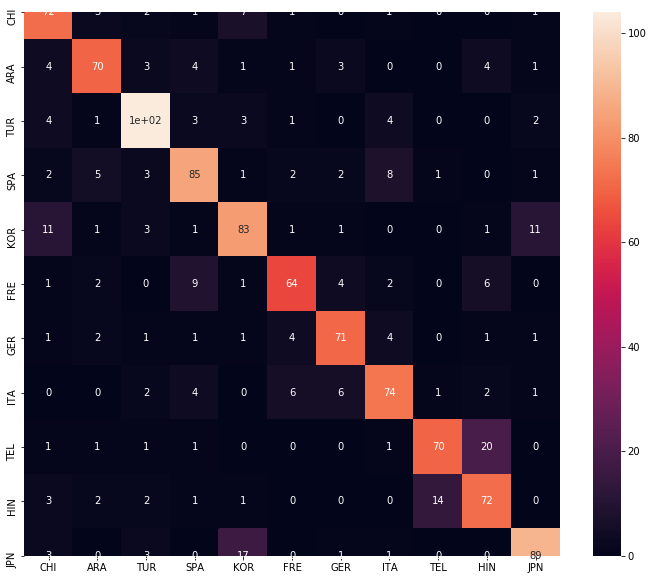

In [53]:
logisticRegression(t, train.lang, te, test.lang, "Binary Matrix words & bigrams")

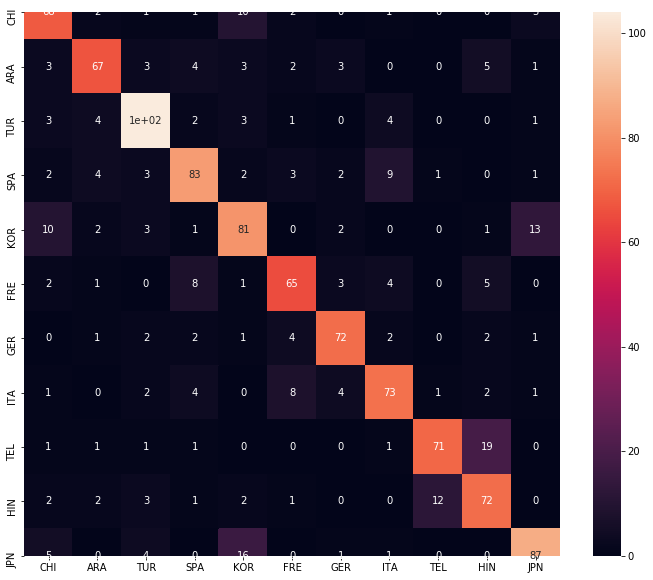

In [62]:
passiveAggressiveClassifier(t,train.lang,te,test.lang,"Binary Matrix words & bigrams")

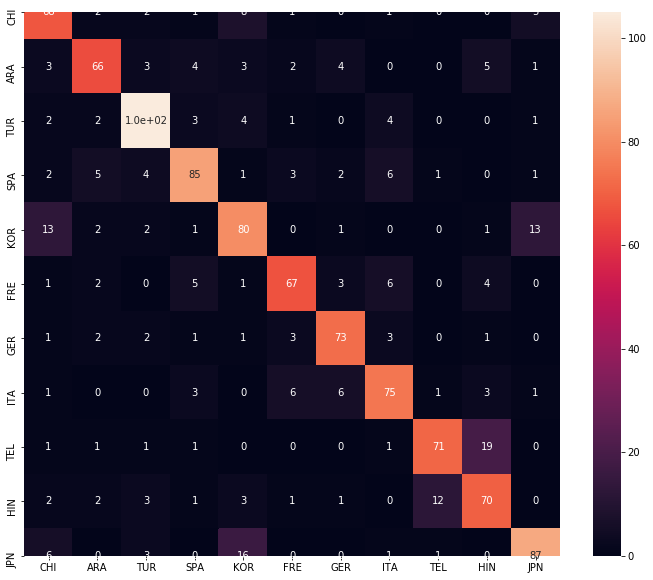

In [58]:
linearSVC(t,train.lang,te,test.lang,"Binary Matrix words & bigrams")

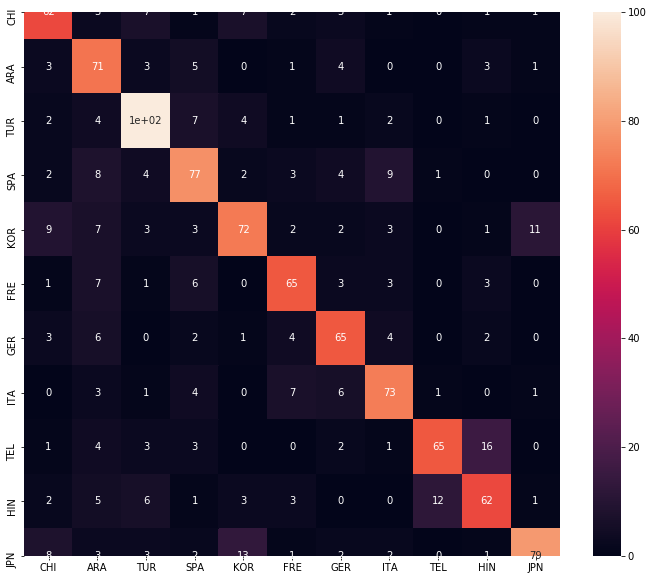

In [61]:
sGDClassifier(t,train.lang,te,test.lang,"Binary Matrix words & bigrams")

## Count Matrice words & bigrams

In [63]:
# création des matrices.
vectorizer = CountVectorizer(dtype=np.int8,ngram_range=(1,2));
t = vectorizer.fit_transform(train.text);
te = vectorizer.transform(test.text);

In [64]:
set_experiment("Count Matrix words & bigrams")

INFO: 'Count Matrix words & bigrams' does not exist. Creating a new experiment


C:\Users\ghile\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\ghile\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

C:\Users\ghile\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\ghile\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



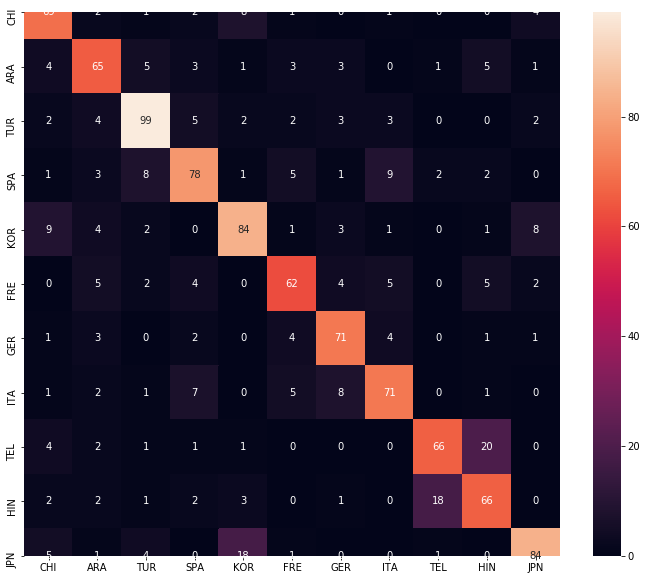

In [65]:
logisticRegression(t,train.lang,te,test.lang,"Count Matrix words & bigrams")

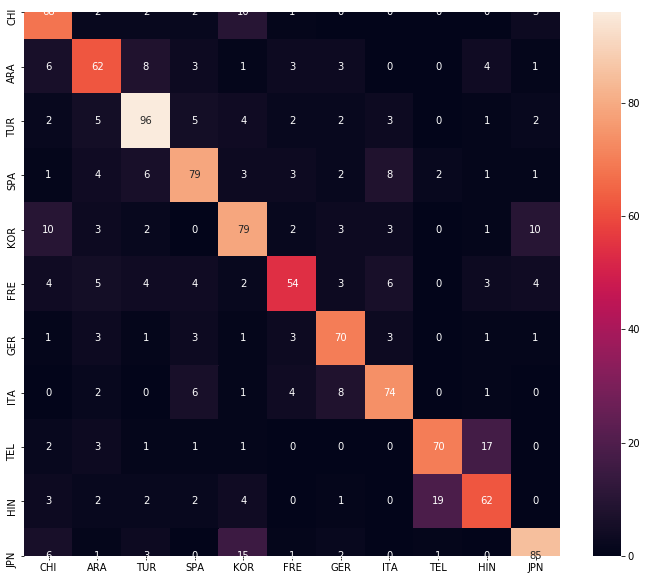

In [66]:
passiveAggressiveClassifier(t,train.lang,te,test.lang,"Count Matrix words & bigrams")

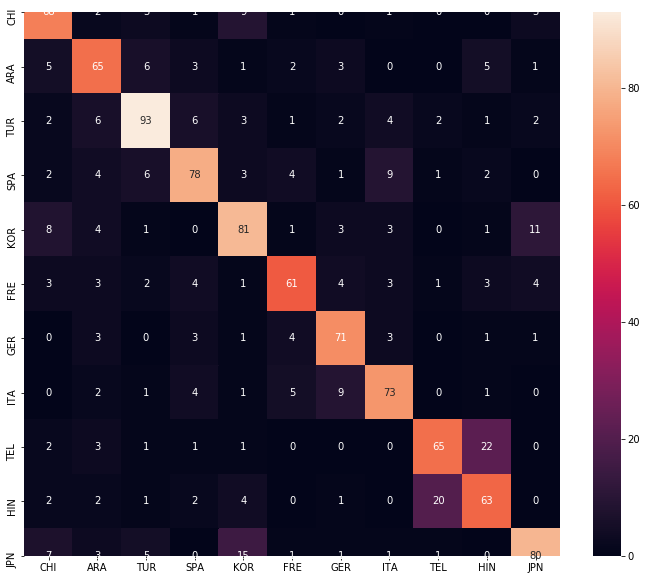

In [67]:
linearSVC(t,train.lang,te,test.lang,"Count Matrix words & bigrams")

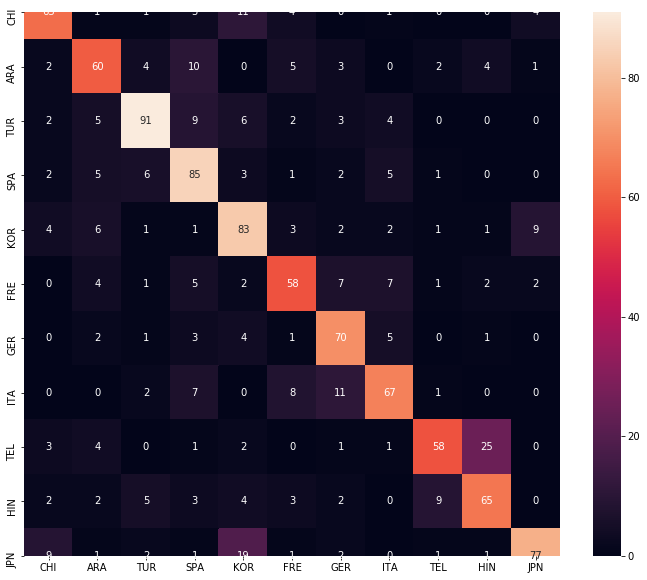

In [68]:
sGDClassifier(t,train.lang,te,test.lang,"Count Matrix words & bigrams")

## TF-IDF Matrice words & bigrams

In [69]:
# création des matrices.
vectorizer = TfidfVectorizer(dtype=np.float32,ngram_range=(1,2));
t = vectorizer.fit_transform(train.text);
te = vectorizer.transform(test.text);

In [70]:
set_experiment('TF-IDF Matricoe wrds & bigrams')

INFO: 'TF-IDF Matricoe wrds & bigrams' does not exist. Creating a new experiment


C:\Users\ghile\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\ghile\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

C:\Users\ghile\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\ghile\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



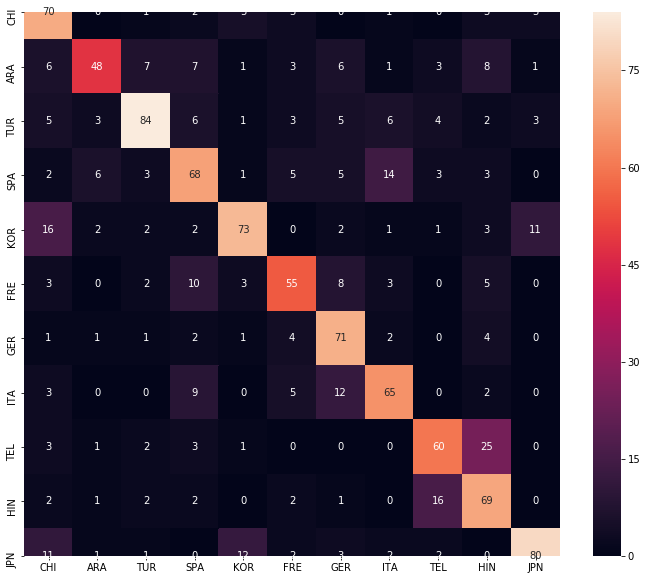

In [71]:
logisticRegression(t,train.lang,te,test.lang,"TF-IDF Matricoe wrds & bigrams")

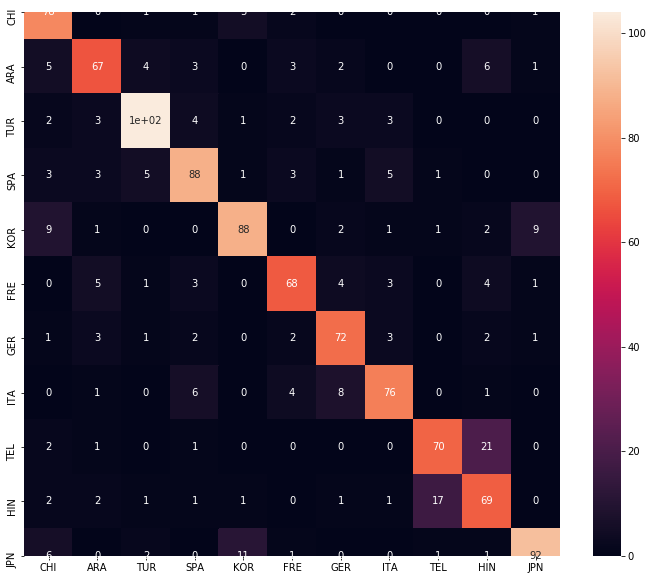

In [72]:
passiveAggressiveClassifier(t,train.lang,te,test.lang,"TF-IDF Matrice words & bigrams")

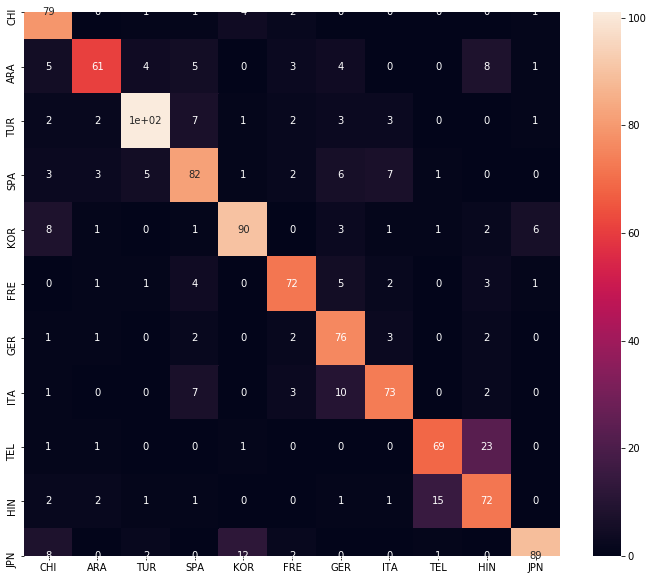

In [73]:
linearSVC(t,train.lang,te,test.lang,"TF-IDF Matrice words & bigrams")

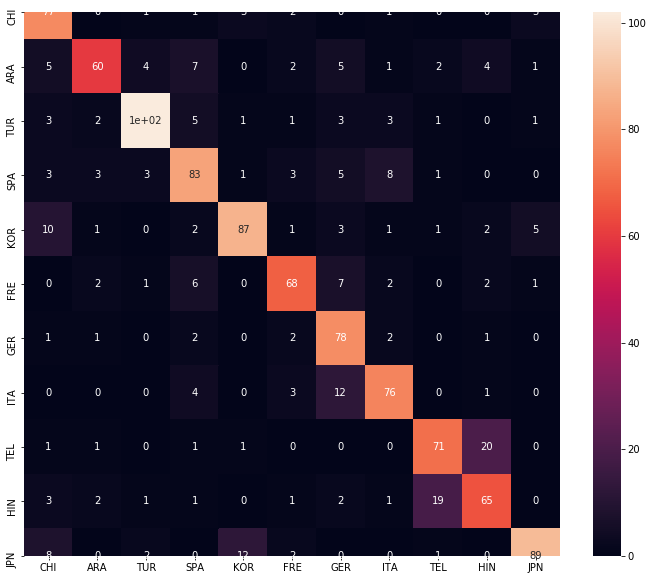

In [74]:
sGDClassifier(t,train.lang,te,test.lang,"TF-IDF Matrice words & bigrams")

# Mots + Trigrammes

## Binary Matrice words & trigrams

## Count Matrice words & trigrams

## TF-IDF Matrice words & trigrams

# Bigrammes + Trigrammes

## Binary Matrice bigrams & trigrams

In [75]:
# création des matrices.
vectorizer = CountVectorizer(dtype=np.int8,ngram_range=(2,3),binary=True);
t = vectorizer.fit_transform(train.text);
te = vectorizer.transform(test.text);

In [76]:
set_experiment("Binary Matrix bigrams & trigrams")

INFO: 'Binary Matrix bigrams & trigrams' does not exist. Creating a new experiment


C:\Users\ghile\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\ghile\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

C:\Users\ghile\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\ghile\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



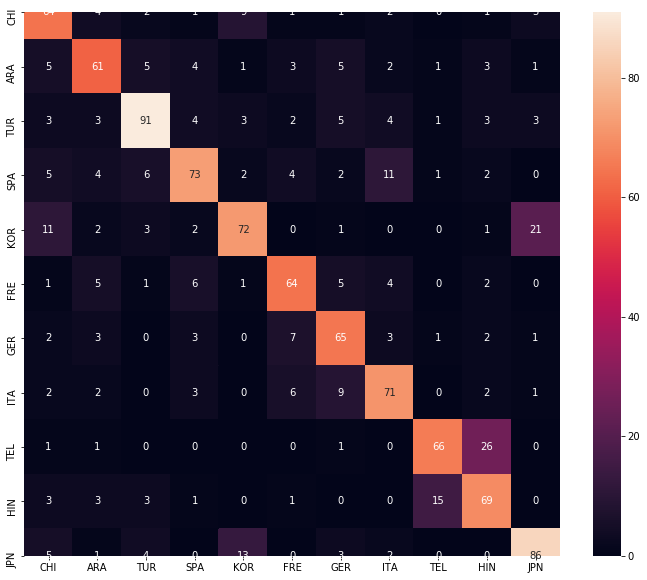

In [77]:
logisticRegression(t,train.lang,te,test.lang,"Binary Matrix bigrams & trigrams")

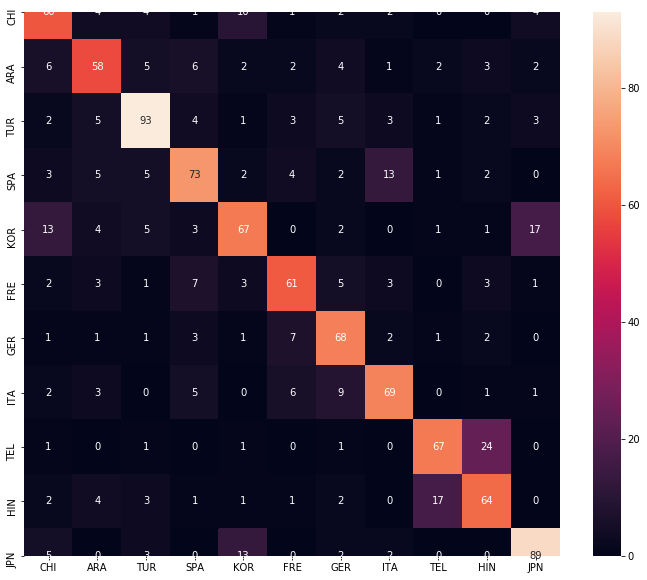

In [78]:
passiveAggressiveClassifier(t,train.lang,te,test.lang,"Binary Matrix bigrams & trigrams")

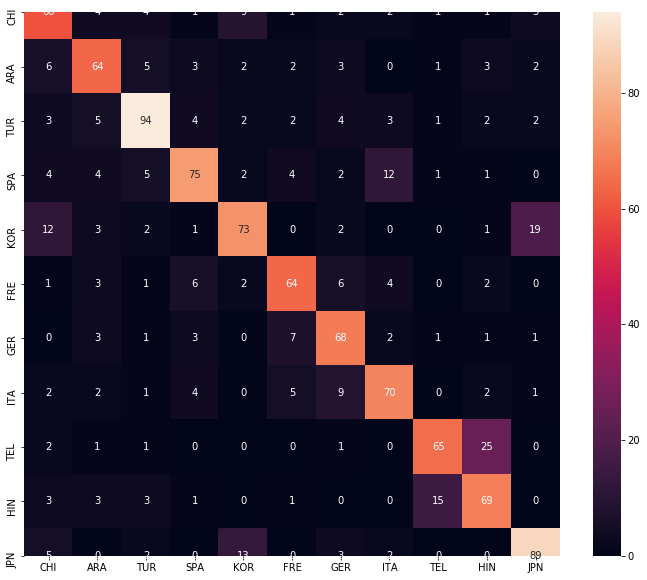

In [79]:
linearSVC(t,train.lang,te,test.lang,"Binary Matrix bigrams & trigrams")

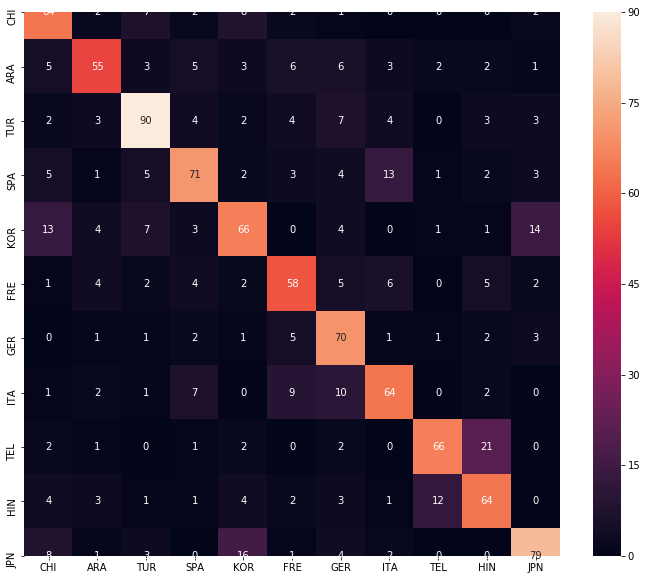

In [80]:
sGDClassifier(t,train.lang,te,test.lang,"Binary Matrix bigrams & trigrams")

## Count Matrice bigrams & trigrams

In [82]:
# création des matrices.
vectorizer = CountVectorizer(dtype=np.int8,ngram_range=(2,3));
t = vectorizer.fit_transform(train.text);
te = vectorizer.transform(test.text);

In [83]:
set_experiment("Count Matrix bigrams & trigrams")

INFO: 'Count Matrix bigrams & trigrams' does not exist. Creating a new experiment


C:\Users\ghile\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\ghile\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

C:\Users\ghile\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\ghile\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



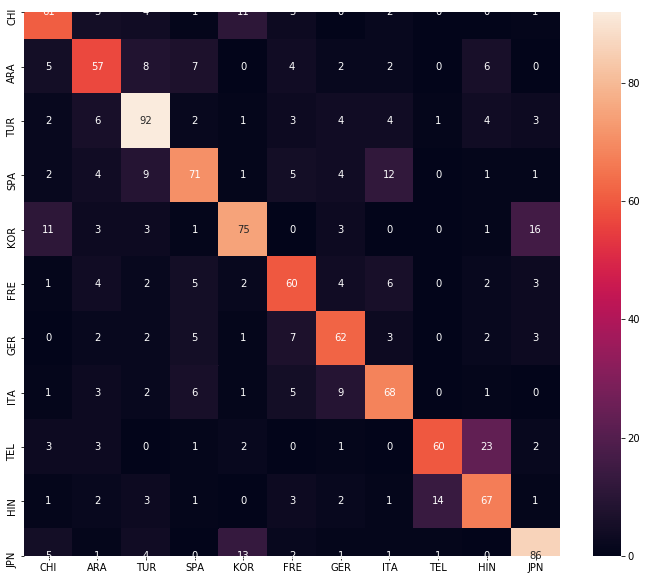

In [84]:
logisticRegression(t,train.lang,te,test.lang,"Count Matrix bigrams & trigrams")

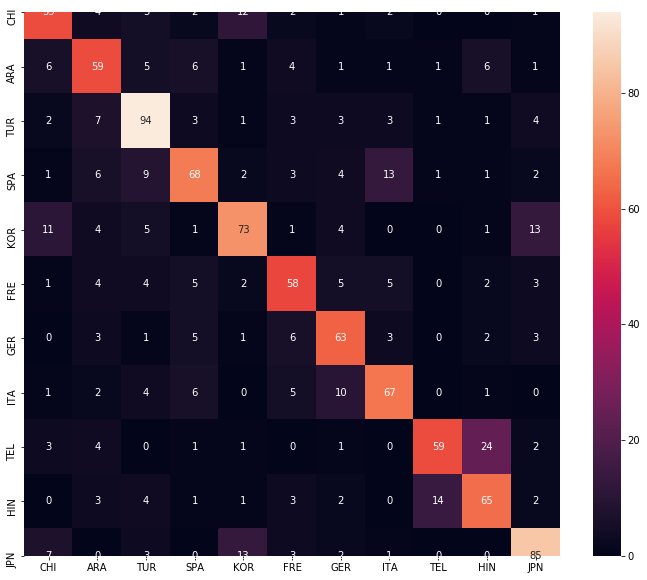

In [85]:
passiveAggressiveClassifier(t,train.lang,te,test.lang,"Count Matrix bigrams & trigrams")

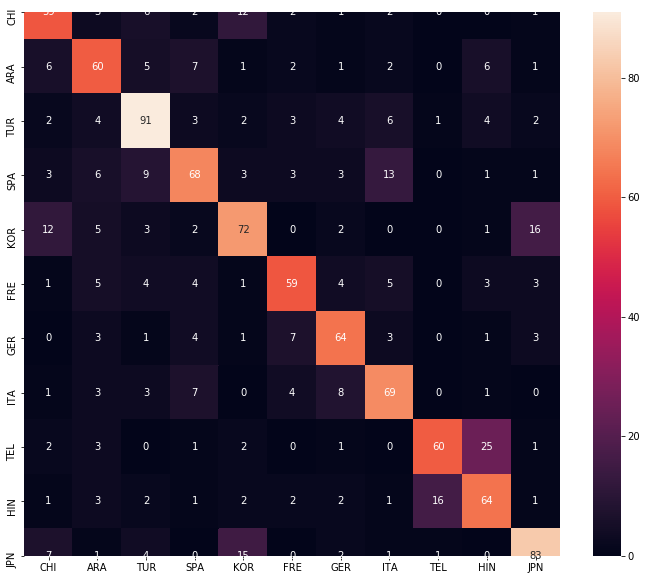

In [86]:
linearSVC(t,train.lang,te,test.lang,"Count Matrix bigrams & trigrams")

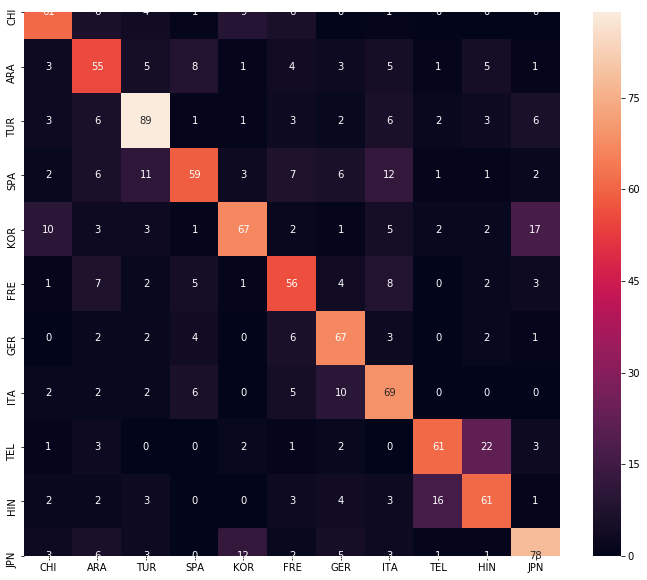

In [87]:
sGDClassifier(t,train.lang,te,test.lang,"Count Matrix bigrams & trigrams")

## TF-IDF Matrice bigrams & trigrams

In [88]:
# création des matrices.
vectorizer = CountVectorizer(dtype=np.int8,ngram_range=(2,3));
t = vectorizer.fit_transform(train.text);
te = vectorizer.transform(test.text);

In [89]:
set_experiment("TF-IDF Matrix bigrams & trigrams")

INFO: 'TF-IDF Matrix bigrams & trigrams' does not exist. Creating a new experiment


C:\Users\ghile\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\ghile\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

C:\Users\ghile\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\ghile\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



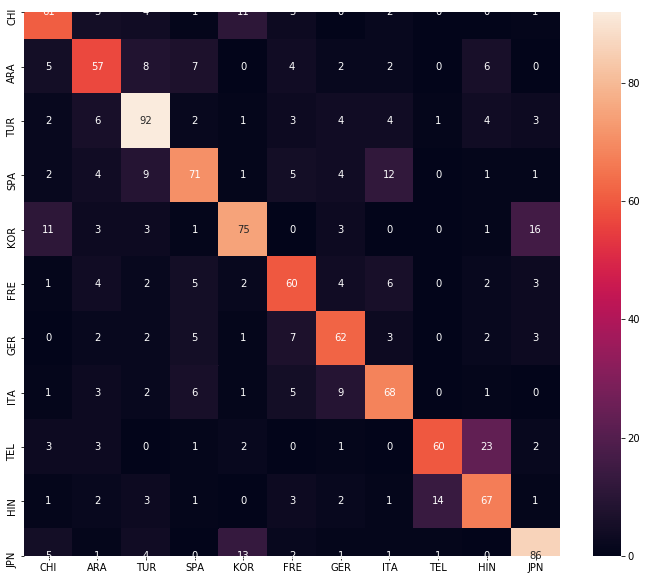

In [90]:
logisticRegression(t,train.lang,te,test.lang,"TF-IDF Matrix bigrams & trigrams")

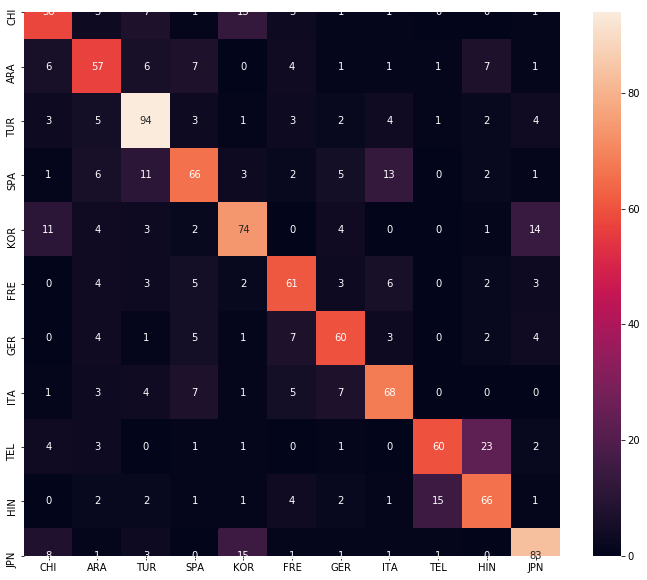

In [91]:
passiveAggressiveClassifier(t,train.lang,te,test.lang,"TF-IDF Matrix bigrams & trigrams")

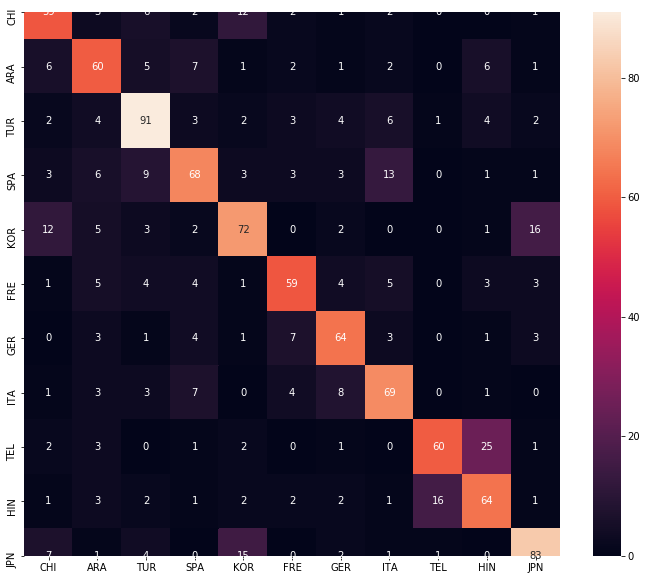

In [92]:
linearSVC(t,train.lang,te,test.lang,"TF-IDF Matrix bigrams & trigrams")

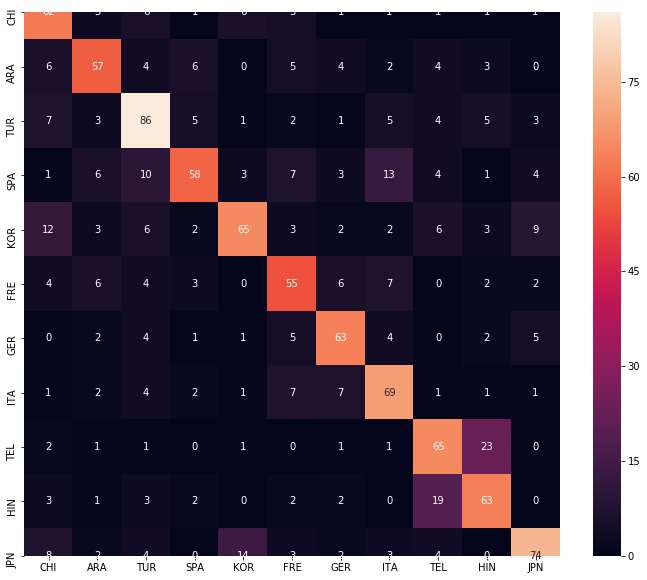

In [93]:
sGDClassifier(t,train.lang,te,test.lang,"TF-IDF Matrix bigrams & trigrams")

# Mots + Bigrammes + Trigrammes

## Binary Matrice words, bigrams & trigrams

In [94]:
# création des matrices.
vectorizer = CountVectorizer(dtype=np.int8,ngram_range=(1,3),binary=True);
t = vectorizer.fit_transform(train.text);
te = vectorizer.transform(test.text);

In [95]:
set_experiment("Binary Matrix words, bigrams & trigrams")

INFO: 'Binary Matrix words, bigrams & trigrams' does not exist. Creating a new experiment


C:\Users\ghile\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\ghile\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

C:\Users\ghile\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\ghile\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



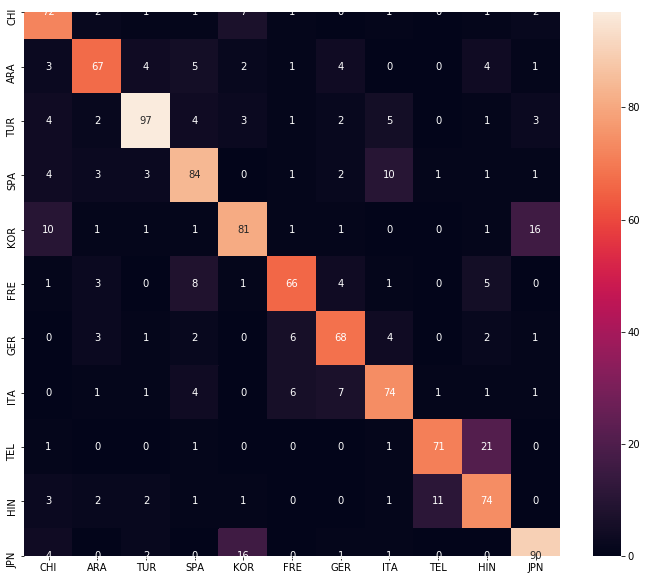

In [96]:
logisticRegression(t,train.lang,te,test.lang,"Binary Matrix words, bigrams & trigrams")

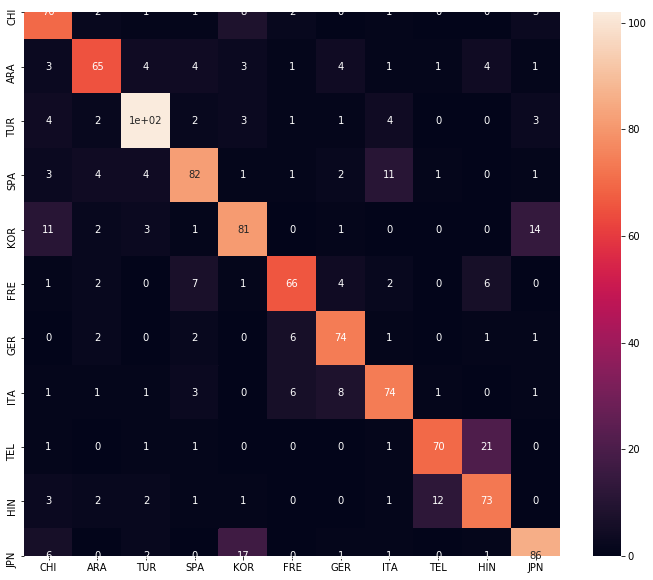

In [97]:
passiveAggressiveClassifier(t,train.lang,te,test.lang,"Binary Matrix words, bigrams & trigrams")

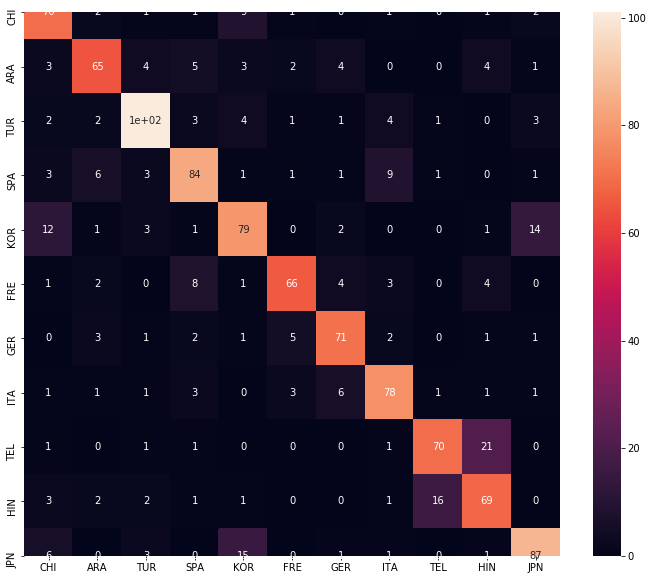

In [98]:
linearSVC(t,train.lang,te,test.lang,"Binary Matrix words, bigrams & trigrams")

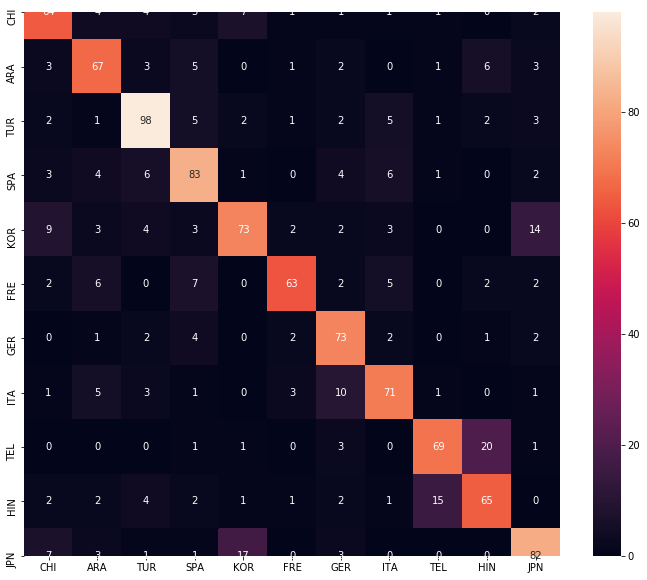

In [99]:
sGDClassifier(t,train.lang,te,test.lang,"Binary Matrix words, bigrams & trigrams")

## Count Matrice words, bigrams & trigrams

In [100]:
# création des matrices.
vectorizer = CountVectorizer(dtype=np.int8,ngram_range=(1,3));
t = vectorizer.fit_transform(train.text);
te = vectorizer.transform(test.text);

In [101]:
set_experiment("Count Matrix words, bigrams & trigrams")

INFO: 'Count Matrix words, bigrams & trigrams' does not exist. Creating a new experiment


C:\Users\ghile\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\ghile\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

C:\Users\ghile\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\ghile\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



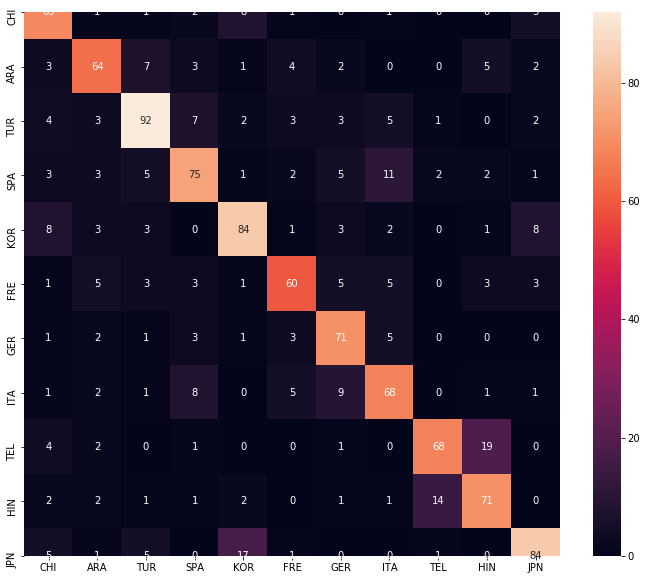

In [102]:
logisticRegression(t,train.lang,te,test.lang,"Count Matrix words, bigrams & trigrams")

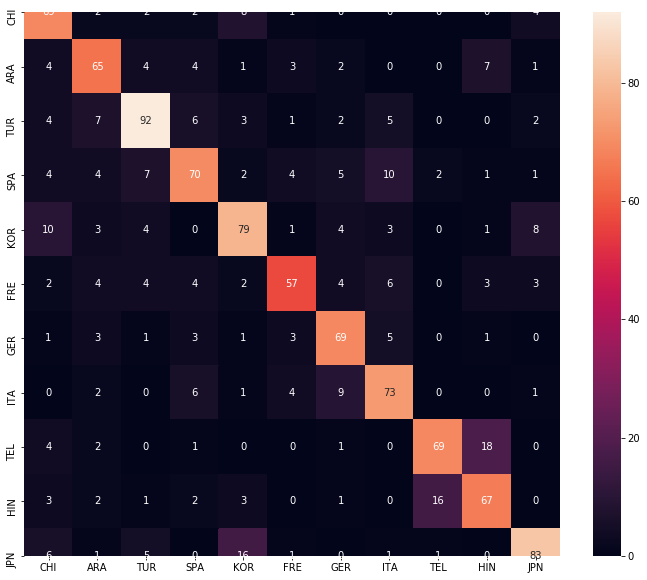

In [103]:
passiveAggressiveClassifier(t,train.lang,te,test.lang,"Count Matrix words, bigrams & trigrams")

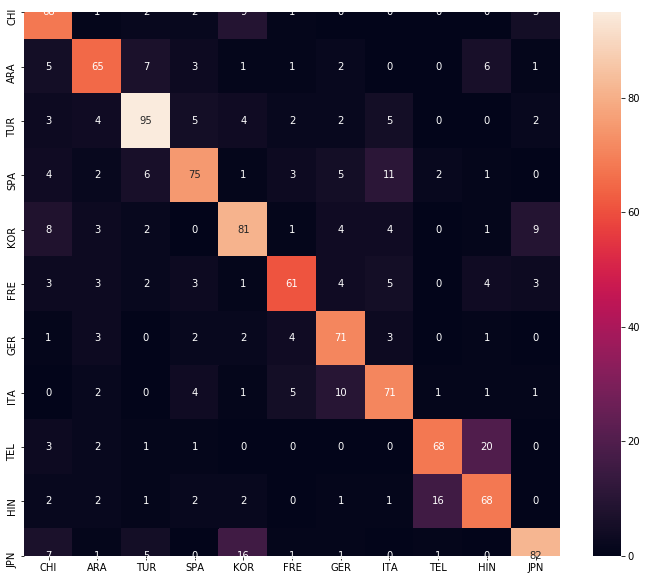

In [104]:
linearSVC(t,train.lang,te,test.lang,"Count Matrix words, bigrams & trigrams")

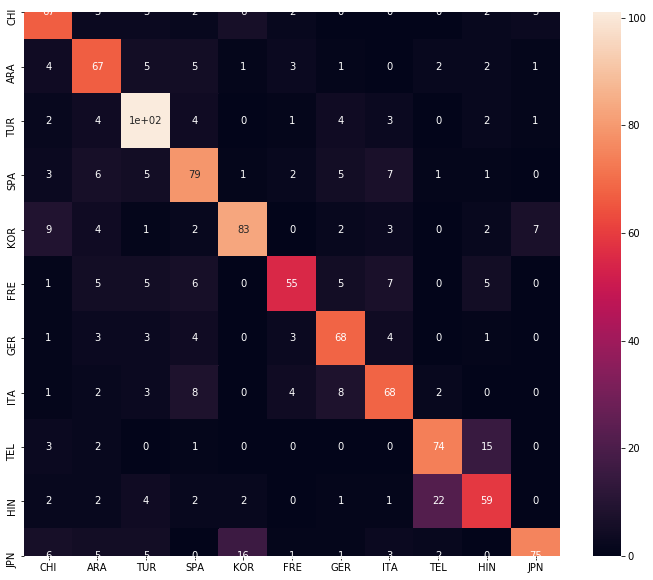

In [105]:
sGDClassifier(t,train.lang,te,test.lang,"Count Matrix words, bigrams & trigrams")

## TF-IDF Matrice words, bigrams & trigrams

In [106]:
# création des matrices.
vectorizer = TfidfVectorizer(dtype=np.float32,ngram_range=(1,3));
t = vectorizer.fit_transform(train.text);
te = vectorizer.transform(test.text);

In [107]:
set_experiment("TF-IDF Matrix words, bigrams & trigrams")

INFO: 'TF-IDF Matrix words, bigrams & trigrams' does not exist. Creating a new experiment


In [108]:
logisticRegression(t,train.lang,te,test.lang,"TF-IDF Matrix words, bigrams & trigrams")

C:\Users\ghile\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\ghile\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

C:\Users\ghile\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\ghile\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



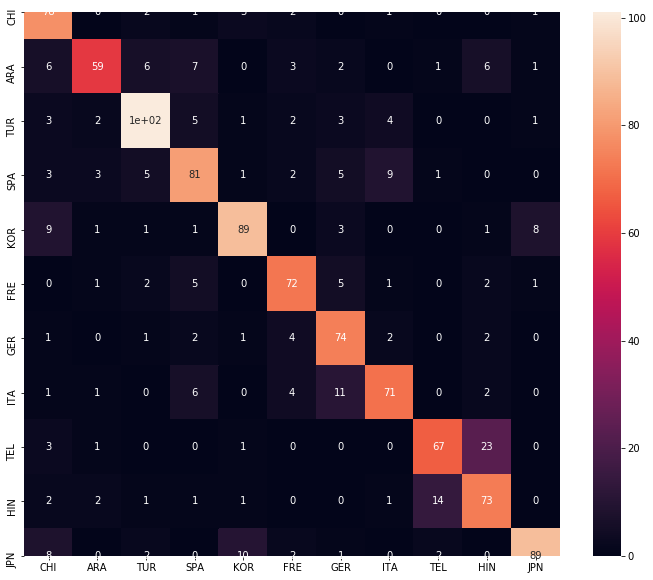

In [109]:
passiveAggressiveClassifier(t,train.lang,te,test.lang,"TF-IDF Matrix words, bigrams & trigrams")

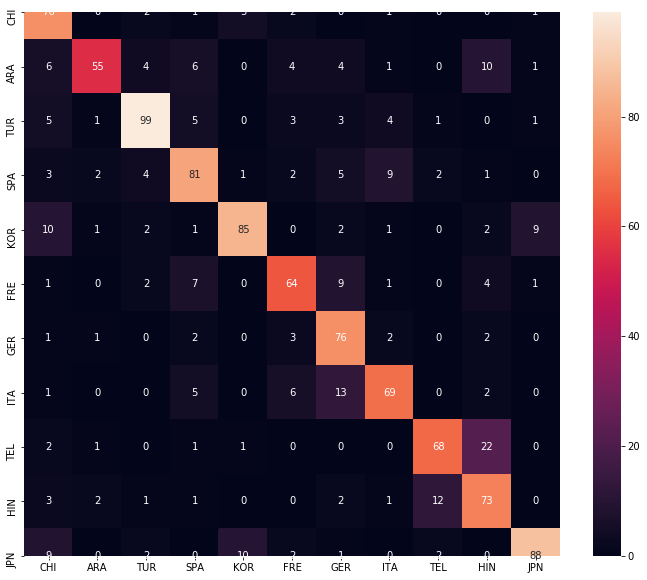

In [110]:
linearSVC(t,train.lang,te,test.lang,"TF-IDF Matrix words, bigrams & trigrams")

In [111]:
sGDClassifier(t,train.lang,te,test.lang,"TF-IDF Matrix words, bigrams & trigrams")

In [ ]:
# faire un tunning de modèle de logistique régression 
# Comment faire cel